In [79]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import datetime

In [80]:
companies_dict = {
'Advanced Micro Devices Inc'	:'AMD',
'Adobe Inc.'	:'ADBE',
'Align Technology Inc'	:'ALGN',
'Amazon.com Inc'	:'AMZN',
'Amgen Inc'	:'AMGN',
'American Electric Power Company Inc'	:'AEP',
'Analog Devices Inc'	:'ADI',
'ANSYS Inc'	:'ANSS',
'Apple Inc'	:'AAPL',
'Applied Materials Inc'	:'AMAT',
'ASML Holding NV'	:'ASML',
'Atlassian Corporation PLC'	:'TEAM',
'Autodesk Inc'	:'ADSK',
'Activision Blizzard Inc'	:'ATVI',
'Automatic Data Processing Inc'	:'ADP',
'Broadcom Inc'	:'AVGO',
'Baidu Inc'	:'BIDU',
'Biogen Inc'	:'BIIB',
'Biomarin Pharmaceutical Inc'	:'BMRN',
'Booking Holdings Inc'	:'BKNG',
'Cadence Design Systems Inc'	:'CDNS',
'CDW Corp'	:'CDW',
'Cerner Corp'	:'CERN',
'Check Point Software Technologies Ltd'	:'CHKP',
'Charter Communications Inc'	:'CHTR',
'Copart Inc'	:'CPRT',
'CrowdStrike Holdings Inc'	:'CRWD',
'Cintas Corp'	:'CTAS',
'Cisco Systems Inc'	:'CSCO',
'Comcast Corp'	:'CMCSA',
'Costco Wholesale Corp'	:'COST',
'CSX Corp'	:'CSX',
'Cognizant Technology Solutions Corp'	:'CTSH',
'DocuSign Inc'	:'DOCU',
'Dexcom Inc'	:'DXCM',
'Dollar Tree Inc'	:'DLTR',
'Electronic Arts'	:'EA',
'eBay Inc'	:'EBAY',
'Exelon Corp'	:'EXC',
'Fastenal Co'	:'FAST',
'Facebook'	:'FB',
'Fiserv Inc'	:'FISV',
'Fox Corp. Class B'	:'FOX',
'Fox Corp. Class A'	:'FOXA',
'Gilead Sciences Inc'	:'GILD',
'Alphabet Class C'	:'GOOG',
'Alphabet Class A'	:'GOOGL',
'Honeywell International Inc'	:'HON',
'Illumina Inc'	:'ILMN',
'Incyte Corp'	:'INCY',
'Intel Corp'	:'INTC',
'Intuit Inc'	:'INTU',
'Intuitive Surgical Inc'	:'ISRG',
'Marvell Technology Inc'	:'MRVL',
'IDEXX Laboratories Inc'	:'IDXX',
'JD.Com Inc'	:'JD',
'Keurig Dr Pepper Inc'	:'KDP',
'KLA Corp'	:'KLAC',
'Kraft Heinz Co'	:'KHC',
'Lam Research Corp'	:'LRCX',
'Lululemon Athletica Inc'	:'LULU',
'Mercadolibre Inc'	:'MELI',
'Marriott International Inc'	:'MAR',
'Match Group Inc'	:'MTCH',
'Microchip Technology Inc'	:'MCHP',
'Mondelez International Inc'	:'MDLZ',
'Moderna Inc'	:'MRNA',
'Monster Beverage Corp'	:'MNST',
'Microsoft Corp'	:'MSFT',
'Micron Technology Inc'	:'MU',
'Netflix Inc'	:'NFLX',
'NetEase Inc'	:'NTES',
'NVIDIA Corp'	:'NVDA',
'NXP Semiconductors NV'	:'NXPI',
'Okta Inc'	:'OKTA',
'O’Reilly Automotive Inc'	:'ORLY',
'Paychex Inc'	:'PAYX',
'Paccar Inc'	:'PCAR',
'Pinduoduo Inc'	:'PDD',
'Peloton Interactive Inc'	:'PTON',
'PayPal Holdings Inc'	:'PYPL',
'PepsiCo Inc.'	:'PEP',
'Qualcomm Inc'	:'QCOM',
'Regeneron Pharmaceuticals Inc'	:'REGN',
'Ross Stores Inc'	:'ROST',
'Sirius XM Holdings Inc'	:'SIRI',
'Seagen Inc'	:'SGEN',
'Splunk Inc'	:'SPLK',
'Skyworks Solutions Inc'	:'SWKS',
'Starbucks Corp'	:'SBUX',
'Synopsys Inc'	:'SNPS',
'Trip.com Group Ltd'	:'TCOM',
'Tesla Inc'	:'TSLA',
'Texas Instruments Inc'	:'TXN',
'T-Mobile US Inc'	:'TMUS',
'Verisign Inc'	:'VRSN',
'Verisk Analytics Inc'	:'VRSK',
'Vertex Pharmaceuticals Inc'	:'VRTX',
'Walgreens Boots Alliance Inc'	:'WBA',
'Workday Inc'	:'WDAY',
'Xcel Energy Inc'	:'XEL',
'Xilinx Inc'	:'XLNX',
'Zoom Video Communications Inc'	:'ZM'
}
companies = sorted(companies_dict.items(), key=lambda x: x[1])


In [81]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '10/24/2019'
end_date = '10/27/2021'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2019-10-24', '2019-10-25', '2019-10-28', '2019-10-29',
               '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-04',
               '2019-11-05', '2019-11-06',
               ...
               '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25',
               '2021-10-26', '2021-10-27'],
              dtype='datetime64[ns]', name='Date', length=507, freq=None), MultiIndex([('Adj Close',  'AMD'),
            ('Adj Close', 'ADBE'),
            ('Adj Close', 'ALGN'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'AMGN'),
            ('Adj Close',  'AEP'),
            ('Adj Close',  'ADI'),
            ('Adj Close', 'ANSS'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'AMAT'),
            ...
            (   'Volume',  'TXN'),
            (   'Volume', 'TMUS'),
            (   'Volume', 'VRSN'),
            (   'Volume', 'VRSK'),
            (   'Volume', 'V

In [82]:

# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AMD       31.719999
ADBE     269.700012
ALGN     249.470001
AMZN    1780.780029
AMGN     203.059998
           ...     
WBA       54.450001
WDAY     158.589996
XEL       64.540001
XLNX      93.120003
ZM        64.519997
Name: 2019-10-24 00:00:00, Length: 103, dtype: float64


In [83]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [84]:
companies[i][1]

'ZM'

In [85]:
movmts = []
for i in range(0, len(companies)):
 print('Company: {}, Ticker: {}, Change: {}'.format(companies[i][0],companies[i][1], sum(movements[i][:])))
 movmts.append([companies[i][0],companies[i][1], sum(movements[i][:])])
movmts 
movmts_df = pd.DataFrame(movmts, columns=['Company', 'Symbol', 'Movement'])
movmts_df

Company: Apple Inc, Ticker: AAPL, Change: 19.789934158325195
Company: Adobe Inc., Ticker: ADBE, Change: 74.32015991210938
Company: Analog Devices Inc, Ticker: ADI, Change: 43.38017272949219
Company: Automatic Data Processing Inc, Ticker: ADP, Change: -315.31982421875
Company: Autodesk Inc, Ticker: ADSK, Change: 36.46022033691406
Company: American Electric Power Company Inc, Ticker: AEP, Change: -4.658203125
Company: Align Technology Inc, Ticker: ALGN, Change: 6.5650787353515625
Company: Applied Materials Inc, Ticker: AMAT, Change: 138.86477661132812
Company: Advanced Micro Devices Inc, Ticker: AMD, Change: 34.64727783203125
Company: Amgen Inc, Ticker: AMGN, Change: -13.16998291015625
Company: Amazon.com Inc, Ticker: AMZN, Change: 157.40968322753906
Company: ANSYS Inc, Ticker: ANSS, Change: 234.06790924072266
Company: ASML Holding NV, Ticker: ASML, Change: 81.25018310546875
Company: Activision Blizzard Inc, Ticker: ATVI, Change: -29.16995620727539
Company: Broadcom Inc, Ticker: AVGO, Ch

,Company,Symbol,Movement
0,Apple Inc,AAPL,19.789934
1,Adobe Inc.,ADBE,74.320160
2,Analog Devices Inc,ADI,43.380173
3,Automatic Data Processing Inc,ADP,-315.319824
4,Autodesk Inc,ADSK,36.460220
...,...,...,...
98,Walgreens Boots Alliance Inc,WBA,-11.040039
99,Workday Inc,WDAY,30.785011
100,Xcel Energy Inc,XEL,6.140034
101,Xilinx Inc,XLNX,22.215271


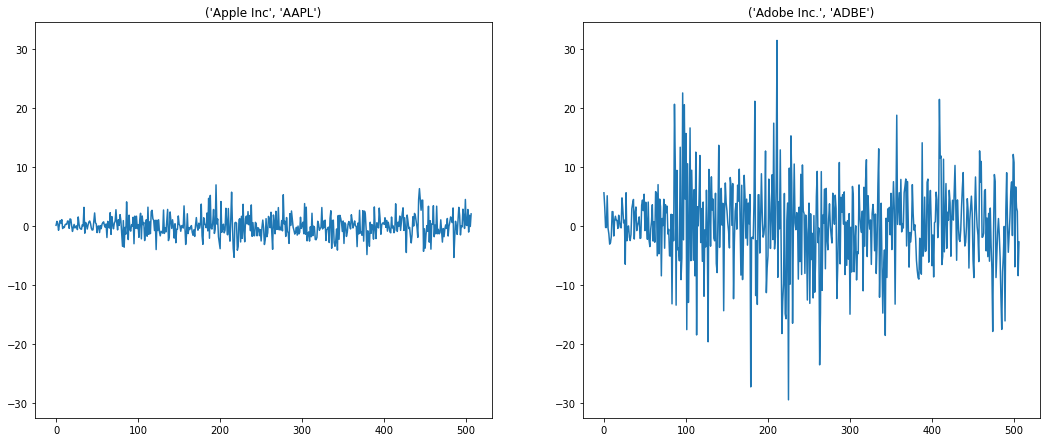

In [86]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [87]:
import numpy as np
movements
where_are_NaNs = np.isnan(movements)
movements[where_are_NaNs] = 0
movements

array([[ 0.13999939,  0.80999947,  0.52999878, ...,  1.84000397,
        -0.05999756,  2.07990265],
       [ 5.66000366,  3.18002319, -0.22998047, ...,  2.5       ,
        -8.40997314, -2.69000244],
       [12.16999817, -2.45999146,  7.05999756, ..., -0.19000244,
        -1.35998535, 11.09997559],
       ...,
       [-0.43000031, -1.02999878, -0.63000107, ..., -0.8299942 ,
        -0.23999786, -1.29000092],
       [ 0.9200058 ,  1.52999878, -1.08999634, ...,  1.77999878,
        -5.17999268,  8.72520447],
       [ 1.51999664, -0.88000107,  2.59999847, ...,  3.75      ,
        -4.62997437, -2.3999939 ]])

In [88]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.52568590567492
-0.36634955483030684
0.0006838116269016261


In [89]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [90]:
panel_data

Attributes   Adj Close                                                   \
Symbols            AMD        ADBE        ALGN         AMZN        AMGN   
Date                                                                      
2019-10-24   31.719999  269.700012  249.470001  1780.780029  192.002090   
2019-10-25   32.709999  270.980011  243.380005  1761.329956  191.992661   
2019-10-28   33.689999  271.350006  250.419998  1777.079956  193.845901   
2019-10-29   33.029999  271.450012  256.119995  1762.709961  197.609177   
2019-10-30   33.130001  278.410004  252.710007  1779.989990  199.396255   
...                ...         ...         ...          ...         ...   
2021-10-21  119.330002  638.659973  599.489990  3435.010010  208.990005   
2021-10-22  119.820000  643.580017  590.559998  3335.550049  209.240005   
2021-10-25  122.360001  646.969971  589.809998  3320.370117  207.630005   
2021-10-26  122.930000  642.500000  593.299988  3376.070068  208.679993   
2021-10-27  123.709900  641.789978  602.380005  3400.274902  206.440002   

Attributes                                                             ...  \
Symbols           AEP         ADI        ANSS        AAPL        AMAT  ...   
Date                                                                   ...   
2019-10-24  89.627434  101.407921  221.520004   59.911400   53.854305  ...   
2019-10-25  88.344627  102.861839  220.250000   60.649292   54.489960  ...   
2019-10-28  87.427010  104.787537  223.630005   61.256821   55.692806  ...   
2019-10-29  87.239738  104.036514  222.300003   59.840076   54.294373  ...   
2019-10-30  88.110535  104.229088  225.190002   59.832699   53.991215  ...   
...               ...         ...         ...         ...         ...  ...   
2021-10-21  85.199997  178.809998  370.649994  149.479996  133.339996  ...   
2021-10-22  85.580002  178.419998  370.040009  148.690002  135.929993  ...   
2021-10-25  84.669998  180.520004  374.209991  148.639999  135.759995  ...   
2021-10-26  84.419998  179.880005  376.470001  149.320007  132.000000  ...   
2021-10-27  84.709999  172.225006  371.785004  149.335007  133.059998  ...   

Attributes     Volume                                                         \
Symbols           TXN       TMUS       VRSN       VRSK       VRTX        WBA   
Date                                                                           
2019-10-24  6205400.0  1884900.0   526800.0   731800.0  1881000.0  3522400.0   
2019-10-25  4788200.0  2006100.0  1151700.0   536600.0  1199300.0  4806500.0   
2019-10-28  6492900.0  3054300.0   531800.0   716700.0  1337400.0  8066900.0   
2019-10-29  4622200.0  4154800.0   549600.0  1962800.0  1695000.0  5968900.0   
2019-10-30  5276200.0  4150000.0   538200.0  1340500.0  1195700.0  3684400.0   
...               ...        ...        ...        ...        ...        ...   
2021-10-21  3276300.0  6744800.0   414000.0   515400.0  1629100.0  4739300.0   
2021-10-22  3648800.0  5213100.0   343300.0   669000.0  1945200.0  5149600.0   
2021-10-25  4254900.0  5940100.0   457200.0   896300.0   982600.0  5060100.0   
2021-10-26  5812000.0  4600800.0   537400.0  1034200.0  1003400.0  5806100.0   
2021-10-27  6244474.0  1329485.0   184581.0   399782.0   461544.0  2306878.0   

Attributes                                              
Symbols          WDAY        XEL       XLNX         ZM  
Date                                                    
2019-10-24  2307800.0  2579100.0  6455400.0  3433300.0  
2019-10-25  1213400.0  3336400.0  3470400.0  1921900.0  
2019-10-28  1430200.0  3329600.0  3110900.0  3509300.0  
2019-10-29   942000.0  2490800.0  2941300.0  1825300.0  
2019-10-30  1393900.0  2761800.0  3563300.0  4670300.0  
...               ...        ...        ...        ...  
2021-10-21  1239100.0  2344300.0  1237700.0  1496600.0  
2021-10-22  1069700.0  1978800.0  1556600.0  3318200.0  
2021-10-25  1717000.0  2402800.0  1102800.0  2925600.0  
2021-10-26   868300.0  3925600.0  2534100.0  242090

In [91]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [92]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
# print(df.sort_values('labels'))
df

,labels,companies
0,5,"(Apple Inc, AAPL)"
1,6,"(Adobe Inc., ADBE)"
2,6,"(Analog Devices Inc, ADI)"
3,2,"(Automatic Data Processing Inc, ADP)"
4,4,"(Autodesk Inc, ADSK)"
...,...,...
98,4,"(Walgreens Boots Alliance Inc, WBA)"
99,6,"(Workday Inc, WDAY)"
100,7,"(Xcel Energy Inc, XEL)"
101,5,"(Xilinx Inc, XLNX)"


In [93]:
movmts_df


,Company,Symbol,Movement
0,Apple Inc,AAPL,19.789934
1,Adobe Inc.,ADBE,74.320160
2,Analog Devices Inc,ADI,43.380173
3,Automatic Data Processing Inc,ADP,-315.319824
4,Autodesk Inc,ADSK,36.460220
...,...,...,...
98,Walgreens Boots Alliance Inc,WBA,-11.040039
99,Workday Inc,WDAY,30.785011
100,Xcel Energy Inc,XEL,6.140034
101,Xilinx Inc,XLNX,22.215271


In [94]:
companies

[('Apple Inc', 'AAPL'),
 ('Adobe Inc.', 'ADBE'),
 ('Analog Devices Inc', 'ADI'),
 ('Automatic Data Processing Inc', 'ADP'),
 ('Autodesk Inc', 'ADSK'),
 ('American Electric Power Company Inc', 'AEP'),
 ('Align Technology Inc', 'ALGN'),
 ('Applied Materials Inc', 'AMAT'),
 ('Advanced Micro Devices Inc', 'AMD'),
 ('Amgen Inc', 'AMGN'),
 ('Amazon.com Inc', 'AMZN'),
 ('ANSYS Inc', 'ANSS'),
 ('ASML Holding NV', 'ASML'),
 ('Activision Blizzard Inc', 'ATVI'),
 ('Broadcom Inc', 'AVGO'),
 ('Baidu Inc', 'BIDU'),
 ('Biogen Inc', 'BIIB'),
 ('Booking Holdings Inc', 'BKNG'),
 ('Biomarin Pharmaceutical Inc', 'BMRN'),
 ('Cadence Design Systems Inc', 'CDNS'),
 ('CDW Corp', 'CDW'),
 ('Cerner Corp', 'CERN'),
 ('Check Point Software Technologies Ltd', 'CHKP'),
 ('Charter Communications Inc', 'CHTR'),
 ('Comcast Corp', 'CMCSA'),
 ('Costco Wholesale Corp', 'COST'),
 ('Copart Inc', 'CPRT'),
 ('CrowdStrike Holdings Inc', 'CRWD'),
 ('Cisco Systems Inc', 'CSCO'),
 ('CSX Corp', 'CSX'),
 ('Cintas Corp', 'CTAS'),
 

In [95]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labbels
print(df.sort_values('labels'))

    labels                          companies
27       0   (CrowdStrike Holdings Inc, CRWD)
21       0                (Cerner Corp, CERN)
32       0            (Dollar Tree Inc, DLTR)
50       0                 (Intel Corp, INTC)
77       0               (Pinduoduo Inc, PDD)
..     ...                                ...
66       4             (Microsoft Corp, MSFT)
67       4            (Match Group Inc, MTCH)
13       4    (Activision Blizzard Inc, ATVI)
8        4  (Advanced Micro Devices Inc, AMD)
51       4                 (Intuit Inc, INTU)

[103 rows x 2 columns]


In [96]:
movmts_df['Cluster'] = labels
movmts_df.sort_values('Company')

,Company,Symbol,Movement,Cluster
11,ANSYS Inc,ANSS,234.067909,1
12,ASML Holding NV,ASML,81.250183,1
13,Activision Blizzard Inc,ATVI,-29.169956,4
1,Adobe Inc.,ADBE,74.320160,1
8,Advanced Micro Devices Inc,AMD,34.647278,4
...,...,...,...,...
99,Workday Inc,WDAY,30.785011,1
100,Xcel Energy Inc,XEL,6.140034,2
101,Xilinx Inc,XLNX,22.215271,3
102,Zoom Video Communications Inc,ZM,6.326828,1


In [97]:
file_path = "Data/Analyzed/"+'NASDAQ100'+"_Clustered_Stocks_Movement.csv"
movmts_df.to_csv(file_path, index=False)

In [98]:
file_path

'Data/Analyzed/NASDAQ100_Clustered_Stocks_Movement.csv'

In [99]:
df

,labels,companies
0,1,"(Apple Inc, AAPL)"
1,1,"(Adobe Inc., ADBE)"
2,1,"(Analog Devices Inc, ADI)"
3,1,"(Automatic Data Processing Inc, ADP)"
4,2,"(Autodesk Inc, ADSK)"
...,...,...
98,2,"(Walgreens Boots Alliance Inc, WBA)"
99,1,"(Workday Inc, WDAY)"
100,2,"(Xcel Energy Inc, XEL)"
101,3,"(Xilinx Inc, XLNX)"


In [100]:
reduced_data


array([[-0.34565107,  0.05745901],
       [-0.25876903, -0.20557897],
       [-0.13335979,  0.09875101],
       [-0.28426112, -0.18798761],
       [ 0.36972404, -0.24280729],
       [ 0.53789882, -0.21738332],
       [-0.12094562,  0.41487044],
       [-0.16400577, -0.06268497],
       [-0.11914369, -0.04599524],
       [-0.31301926,  0.45019411],
       [-0.37334862,  0.31053208],
       [-0.40613419, -0.34830238],
       [-0.20734784,  0.03971106],
       [-0.11300706, -0.27525825],
       [ 0.42714426,  0.07620698],
       [-0.22508584,  0.32987604],
       [-0.26696254,  0.01087392],
       [ 0.12139317, -0.22750414],
       [ 0.07758876, -0.17018964],
       [ 0.06778603,  0.32723098],
       [-0.30652695, -0.01288226],
       [ 0.20144134,  0.20755113],
       [ 0.40271559, -0.12283852],
       [ 0.15136586, -0.05817655],
       [ 0.2251626 , -0.14104211],
       [ 0.11309282,  0.08360066],
       [-0.49068668, -0.23548691],
       [ 0.25593539,  0.14145642],
       [ 0.32272094,

In [101]:
data_df = pd.DataFrame(reduced_data, columns=["PC 1", "PC 2"])
print(data_df.shape)
data_df.head(10)

(103, 2)


,PC 1,PC 2
0,-0.345651,0.057459
1,-0.258769,-0.205579
2,-0.133360,0.098751
3,-0.284261,-0.187988
4,0.369724,-0.242807
5,0.537899,-0.217383
6,-0.120946,0.414870
7,-0.164006,-0.062685
8,-0.119144,-0.045995
9,-0.313019,0.450194


C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


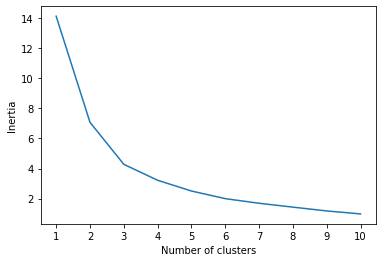

In [102]:
# Initialize empty inertia list
distortions=[]
inertia = []
# Initialize k range
k = list(range(1,11))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, km.cluster_centers_,
                                        'euclidean'), axis=1)) / new.shape[0])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Figure size 432x288 with 0 Axes>

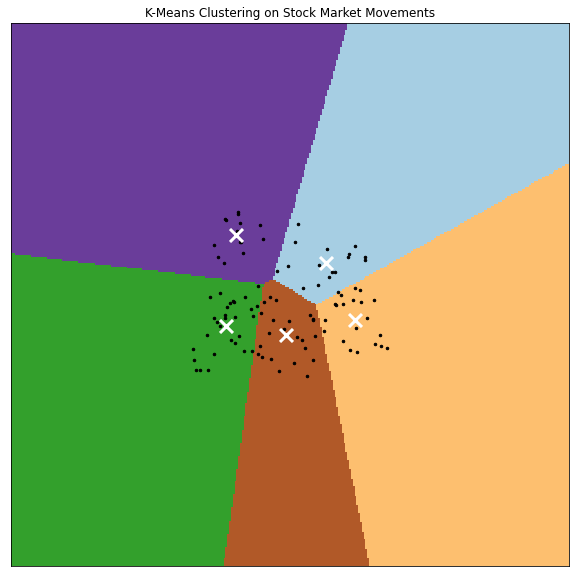

In [103]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()